In [102]:
from IPython.display import Image
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.display import HTML 
import numpy as np
import sympy as sp


In [103]:
#Различный код, который потребуется далее.
def adj_matrix():
    if(radio.value == '1'):
        return 'Неверно. Попробуйте ещё раз.'
    elif(radio.value == '2'):
        return 'Верно, матрица смежности - 2.'
    elif(radio.value == '3'):
        return 'Неверно. Попробуйте ещё раз.'
    else:
        return 'Пожалуйста, выберите номер матрицы смежности.'
    
def p4_spec():
    if(radio2.value == 'A'):
        return 'Верно. Спектр графа содержит три различных собственных значения.'
    elif(radio2.value == 'B'):
        return 'Неверно. Вернитесь к третьему пункту, перечитайте и попробуйте ещё раз.'
    elif(radio2.value == 'C'):
        return 'Неверно. Вернитесь к третьему пункту, перечитайте и попробуйте ещё раз.'
    else:
        return 'Пожалуйста, выберите спектр графа.'

<h1>Лекция №3:<h1>

![title](label1.png)

**План занятия:**
<ol>
<li>Матрица смежности и её свойства</li>
<li>Теорема о числе (i,j)-путей длины k</li>
<li>Характеристический полином графа Г</li>
<li>Характеризация спектральных свойств k-регулярных графов</li>
<li>Спектр графа</li>
<li>Изоспектральные графы</li>
</ol>

![title](label_1.png)

<img align="left" src="defin.png"> &nbsp; Пусть Г = (V,E), |V| = n,
тогда матрица смежности графа $-$ квадратная бинарная матрица порядка n, элементы которой определяются следующим образом:
$A(\Gamma) = (A_{ij})_{n \times n} = 
\begin{cases}
1,\ & i\sim j;\\
0,\ & i \nsim j.
\end{cases}
$

C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


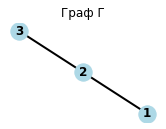

In [104]:
G_test = nx.Graph()
G_test.add_nodes_from([1,2,3])
G_test.add_edges_from([(1,2),(2,3)])
plt.subplot(224)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_test, **options, with_labels=True, font_weight='bold')
plt.title("Граф Г")
plt.show()

Матрица смежности графа Г выглядит следующим образом:
$
A(Г) =
\begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}
$

In [105]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (1, 3), (2,6), (3, 4),(3,5),(2,4),(2,5), (3,6)])

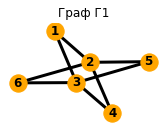

In [106]:
plt.subplot(224)
options = {'node_color': "orange",
          'width': 3,}
nx.draw(G, **options, with_labels=True, font_weight='bold')
plt.title("Граф Г1")
plt.show()

**Рассмотрим граф Г1, приведённый выше. Как выглядит его матрица смежности?**

$$
1 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 1& 0&1\\
\textbf{2} & 1& 0& 1& 1& 1&1\\
\textbf{3} & 0& 0& 0& 0& 0&0\\
\textbf{4} & 1& 1& 0& 1& 1&1\\
\textbf{5} & 0& 1& 0& 1& 1&1\\
\textbf{6} & 0& 1& 1& 0& 0&0\\
\end{pmatrix}
\quad 2 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 0& 1& 1& 0& 0& 0\\
\textbf{2} & 1& 0& 0& 1& 1& 1\\
\textbf{3} & 1& 0& 0& 1& 1& 1\\
\textbf{4} & 0& 1& 1& 0& 0& 0\\
\textbf{5} & 0& 1& 1& 0& 0& 0\\
\textbf{6} & 0& 1& 1& 0& 0& 0\\
\end{pmatrix}
\quad 3 = 
\begin{pmatrix}
&\textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{5} & \textbf{6}\\
\textbf{1} & 1& 0& 0& 1& 1& 1\\
\textbf{2} & 0& 1& 1& 0& 0& 0\\
\textbf{3} & 0& 1& 1& 0& 0& 0\\
\textbf{4} & 1& 0& 0& 1& 1& 1\\
\textbf{5} & 1& 0& 0& 1& 1& 1\\
\textbf{6} & 1& 0& 0& 1& 1& 1\\
\end{pmatrix}
$$

In [107]:
radio = widgets.RadioButtons(
    options=['1', '2', '3'],
    value = None,
    description='A = ',
    disabled=False
)
radio

RadioButtons(description='A = ', options=('1', '2', '3'), value=None)

In [135]:
print(adj_matrix())

Неверно. Попробуйте ещё раз.


In [109]:
#тут можно проверить матрицу смежности графа G
print(nx.linalg.graphmatrix.adjacency_matrix(G).todense())

[[0 1 1 0 0 0]
 [1 0 0 1 1 1]
 [1 0 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]]


C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


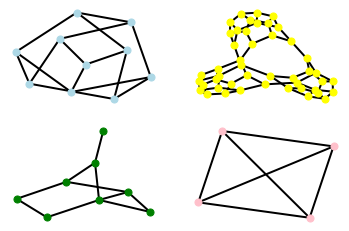

In [110]:
pet = nx.petersen_graph()
tutte = nx.tutte_graph()
sed = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()
plt.subplot(221)
options = {'node_color': "lightblue",
          'width': 2, 'node_size': 50}
nx.draw(pet, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "yellow",
          'width': 2,'node_size': 50}
nx.draw(tutte, **options, with_labels=False, font_weight='bold')
plt.subplot(223)
options = {'node_color': "green",
          'width': 2,'node_size': 50}
nx.draw(sed, **options, with_labels=False, font_weight='bold')
plt.subplot(224)
options = {'node_color': "pink",
          'width': 2,'node_size': 50}
nx.draw(tet, **options, with_labels=False, font_weight='bold')
plt.show()

In [111]:
graph_choose = widgets.ToggleButtons(
    options=['Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'],
    description='Граф:',
    disabled=False,
    button_style='', 
    tooltips=['Граф Петерсена', 'Граф Тутте', 'Лабиринт Седжвика', "Тетраэдр"],
#     icons=['check'] * 3
)
graph_choose

ToggleButtons(description='Граф:', options=('Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'), tooltips=('…

**Выберите граф, и запустите код ниже, чтобы посмотреть матрицу смежности**

In [112]:
if graph_choose.value == 'Petersen':
    print(nx.linalg.graphmatrix.adjacency_matrix(pet).todense())
elif graph_choose.value == 'Tutte':
    print(nx.linalg.graphmatrix.adjacency_matrix(tutte).todense())
elif graph_choose.value == 'Sedgewick Maze':
    print(nx.linalg.graphmatrix.adjacency_matrix(sed).todense())
elif graph_choose.value == 'Tetrahedral':
    print(nx.linalg.graphmatrix.adjacency_matrix(tet).todense())


[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


**Матрица смежности обыкновенного графа:**

* симметричная
* содержит нулевую диагональ (т.к. нет петель)
* $
\displaystyle\sum_{j=1}^na_{ij} = deg(i), \quad i = \overline{1,n}
$ &nbsp; (сумма элементов любой строки совпадает со степенью соответствующей вершины графа).



<img align="left" src="defin.png"> &nbsp; **Соседством вершины** $i$ в графе $G$ называется множество смежных ей вершин.<br>
<img align="left" src="obozn.png">  <br> &nbsp; $N(i) = {j: dist(i,j) = 1}$, где $dist(i,j)$ - расстояние от вершины $i$ до вершины $j$.

<img align="left" src="zam.png"> &nbsp; $|N(i)| = deg(i)$
(Мощность соседства равна степени вершины $i$).

C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


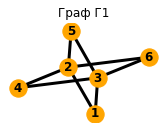

In [113]:
plt.subplot(224)
options = {'node_color': "orange",
          'width': 3,}
nx.draw(G, **options, with_labels=True, font_weight='bold')
plt.title("Граф Г1")
plt.show()

In [114]:
vertice = widgets.IntSlider(
    value=1,
    min=1,
    max=6,
    step=1,
    description='Вершина:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
vertice

IntSlider(value=1, continuous_update=False, description='Вершина:', max=6, min=1)

**Выберите вершину и запустите код ниже чтобы посмотреть соседей вершины и узнать мощность соседства**

In [115]:
print('Соседи вершины', vertice.value, ':', list(G.neighbors(vertice.value)),' Мощность соседства: ', len(list(G.neighbors(vertice.value))))

Соседи вершины 1 : [2, 3]  Мощность соседства:  2


<img align="left" src="defin.png"> &nbsp; **Следом** матрицы $A$ называется сумма диагональных элементов матрицы $A$.<br> <br> 
<img align="left" src="obozn.png"> &nbsp; $Tr(A) = \displaystyle\sum_{i=1}^na_{ii}$

**Маршрут в графе** <br>Если мы зафиксировали две вершины в обыкновенном связном графе, между этими двумя вершинами всегда можно проложить какой-то маршрут от вершины к вершине по ребрам. Ребра и вершины могут повторяться.

<img align="left" src="defin.png"> &nbsp; **Путь** $-$ маршрут, в котором рёбра не повторяются. <br><br>

<img align="left" src="defin.png"> &nbsp; **Простой путь** $-$ маршрут, в котором ни рёбра, ни вершины не повторяются.<br><br>

<img align="left" src="defin.png"> &nbsp; **Кратчайший путь** $-$ кратчайшее расстояние между вершинами.

![title](punkt_2.png)

Степени матрицы смежности задают **число путей** фиксированной длины между двумя заданными вершинами.<br>
<img align="left" src="theorem.png"> <br><br><br>
Пусть $\Gamma = (V,E)$ имеет матрицу смежности $A = A(G)$ и пусть $B = A^k$, где $k$ - некоторое целое число. <br> Тогда $b_{ij}$ равен числу $(i,j)$-путей длины k в графе $\Gamma$.<br>
<img align="left" src="proof.png"><br><br><br>
Воспользуемся индукцией по $k$.
Пусть $k = 1, B = A^1 = A$, тогда теорема выполняется.

Предположим, что условие теоремы выполняется для $k-1$, т.е. для $C = A^{k-1}$.<br>
(Каждый элемент матрицы $C$ соответствует числу путей между вершинами $i$ и $j$ длины $k-1$).<br>
Докажем индукционный переход от $k-1$ к $k$.<br>
Рассмотрим элемент $b_{ij}$.<br>
$B = C \cdot A$<br>
$b_{ij} = \displaystyle\sum_{s=1}^nc_{is}\cdot a_{sj}$, где $c_{is} > 0$ и $a_{sj} > 0$.<br>
По индукционному предположению:
* $c_{is}$ $-$ это число $(i,s)$-путей длины $k-1$;
* $a_{sj}$ соответствует дополнительному ребру $\{s,j\}$.<br>
<img align="left" src="ijpaths.png">

In [116]:
graph_choose2 = widgets.ToggleButtons(
    options=['Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'],
    description='Граф:',
    disabled=False,
    button_style='', 
    tooltips=['Граф Петерсена', 'Граф Тутте', 'Лабиринт Седжвика', "Тетраэдр"],
#     icons=['check'] * 3
)
graph_choose2

ToggleButtons(description='Граф:', options=('Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'), tooltips=('…

In [117]:
if graph_choose2.value == 'Petersen':
    A = nx.linalg.graphmatrix.adjacency_matrix(pet).todense()
elif graph_choose2.value == 'Tutte':
    A = nx.linalg.graphmatrix.adjacency_matrix(tutte).todense()
elif graph_choose2.value == 'Sedgewick Maze':
    A = nx.linalg.graphmatrix.adjacency_matrix(sed).todense()
elif graph_choose2.value == 'Tetrahedral':
    A = nx.linalg.graphmatrix.adjacency_matrix(tet).todense()
#Матрица смежности графа:
print(A)

[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


In [118]:
#Матрица B = A^k, где каждый элемент - это число путей длины k
k = 2
B = np.linalg.matrix_power(A, k)
print(B)

[[3 0 1 1 0 0 1 1 1 1]
 [0 3 0 1 1 1 0 1 1 1]
 [1 0 3 0 1 1 1 0 1 1]
 [1 1 0 3 0 1 1 1 0 1]
 [0 1 1 0 3 1 1 1 1 0]
 [0 1 1 1 1 3 1 0 0 1]
 [1 0 1 1 1 1 3 1 0 0]
 [1 1 0 1 1 0 1 3 1 0]
 [1 1 1 0 1 0 0 1 3 1]
 [1 1 1 1 0 1 0 0 1 3]]


C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


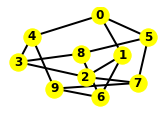

In [119]:
plt.subplot(222)
options = {'node_color': "yellow",
          'width': 2,}
if graph_choose2.value == 'Petersen':
    nx.draw(pet, **options, with_labels=True, font_weight='bold')
elif graph_choose2.value == 'Tutte':
    nx.draw(tutte, **options, with_labels=True, font_weight='bold')
elif graph_choose2.value == 'Sedgewick Maze':
    nx.draw(sed, **options, with_labels=True, font_weight='bold')
elif graph_choose2.value == 'Tetrahedral':
    nx.draw(tet, **options, with_labels=True, font_weight='bold')

plt.show()

<img align="left" src="defin.png"> &nbsp; **След** матрицы $A$ порядка $n$ $-$ это сумма её диагональных элементов.<br>
<img align="left" src="obozn.png"> &nbsp; $Tr(A) = \displaystyle\sum_{i=1}^na_{ii}$<br>
<img align="left" src="sled.png"> <br>&nbsp; Число замкнутых путей длины $k$ в графе $\Gamma$ равно $Tr(A^k)$.<br>
<img align="left" src="sled.png"> <br>&nbsp; Для матрицы смежности $A$ любого обыкновенного графа $\Gamma = (V,E)$ справедливо:<br>
* $Tr(A^0) = Tr(I) = n$
* $Tr(A) = 0$
* $Tr(A^2) = 2 \cdot m$, где $m = |E(\Gamma)|$
* $Tr(A^3) = 6 \cdot t,$ где $t$ $-$ число циклов $C_3$ в графе $\Gamma$<br>

Первый пункт очевиден, при возведении матрицы смежности в нулевую степень получаем единичную матрицу.<br>
Второй пункт очевиден, в обыкновенном графе нет петель и кратных рёбер, следовательно все элементы на диагонали $-$ нули.<br>
Третий пункт следует из того, что замкнутый путь длины 2 представляет собой проход по ребру и обратно в исходную вершину.<br>
Четвертый пункт доказывается аналогично.


![title](punkt_3.png)

<img align="left" src="defin.png"> &nbsp; **Характеристическим полиномом** $P_A(\lambda)$ графа $\Gamma = (V,E)$, $|V| = n$ называется полином вида $det|\lambda I - A| = 0$, где $A = A(\Gamma)$, $I$ - единичная матрица, $\lambda$ - собственные значения $A$.<br>
**Характеристический полином** графа $-$ это характеристический полином его матрицы смежности.<br>
<img align="left" src="obozn.png"> &nbsp; <br> $P_A(\lambda) = det|\lambda I - A|$.<br>
<img align="left" src="zam.png"> &nbsp; <br>Корни $\lambda$ характеристического полинома $P_A(\lambda)$ являются собственными значениями графа $\Gamma$<br>
Пусть $x = (x_1,\dots,x_n)^T -$ собственный (ненулевой) вектор, соответствующий некоторому собственному значению $\lambda$.<br>
Тогда $Ax = \lambda x$ имеет нетривиальное решение.<br>
$(\lambda - A)*x = 0$.<br>
Следовательно, матрица вида $(\lambda I - A) - $ вырожденная, значит ее определитель равен 0.<br>
Рассмотрим в качестве примера $P_3$:

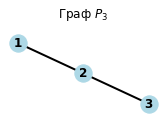

In [120]:
G_test = nx.Graph()
G_test.add_nodes_from([1,2,3])
G_test.add_edges_from([(1,2),(2,3)])
plt.subplot(224)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_test, **options, with_labels=True, font_weight='bold')
plt.title("Граф $P_3$")
plt.show()

Матрица смежности $P_3$:<br>
$
A(P_3) =
\begin{pmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}
$
<br>
Мы можем по-другому занумеровать вершины и тогда матрица смежности будет выглядеть по-другому, однако характеристический полином, являясь инвариантом, для всех матриц изоморфных графов даст одни и те же корни.<br>
Построим полином по данной матрице:<br>
$
P_A(\lambda) = (\lambda I - A) = det
\begin{pmatrix}
\lambda & -1 & 0\\
-1 & \lambda & -1\\
0 & -1 & \lambda
\end{pmatrix}
$<br>
$\lambda(\lambda^2 - 1) - (-1)(-\lambda) = \lambda(\lambda^2 - 2) = 0$ =>: <br>
Корни характеристического полинома:<br>
$\lambda_1 = 0$<br>
$\lambda_2 = \sqrt{2}$<br>
$\lambda_3 = -\sqrt{2}$<br>
Когда мы по матрице смежности находим корни характеристического полинома, мы тем самым находим его собственные значения.<br>
Вспомним свойства определителей.<br>
* $det(I) = 1$
* $det(cA) = c^n * det(A)$, где $A$ - матрица $n*n$ и $c$ $-$ коэффициент
* $det(A*B) = det(A)*det(B)$
* $det(A^T) = det(A)$
* $det(A^{-1} = (detA)^{-1}$<br>

Существует ненулевое решение уравнения $Ax = 0 \Leftrightarrow det(A) = 0$.

In [121]:
graph_choose3 = widgets.ToggleButtons(
    options=['Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'],
    description='Граф:',
    disabled=False,
    button_style='', 
    tooltips=['Граф Петерсена', 'Граф Тутте', 'Лабиринт Седжвика', "Тетраэдр"],
#     icons=['check'] * 3
)
graph_choose3

ToggleButtons(description='Граф:', options=('Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'), tooltips=('…

In [122]:
if graph_choose3.value == 'Petersen':
    A_P3 = nx.linalg.graphmatrix.adjacency_matrix(pet).todense()
elif graph_choose3.value == 'Tutte':
    A_P3 = nx.linalg.graphmatrix.adjacency_matrix(tutte).todense()
elif graph_choose3.value == 'Sedgewick Maze':
    A_P3 = nx.linalg.graphmatrix.adjacency_matrix(sed).todense()
elif graph_choose3.value == 'Tetrahedral':
    A_P3 = nx.linalg.graphmatrix.adjacency_matrix(tet).todense()
from sympy import Matrix
M = Matrix(A_P3)
M.charpoly()

PurePoly(lambda**10 - 15*lambda**8 + 75*lambda**6 - 24*lambda**5 - 165*lambda**4 + 120*lambda**3 + 120*lambda**2 - 160*lambda + 48, lambda, domain='ZZ')

In [123]:
#Корни характеристического полинома:
M.eigenvals()

{3: 1, -2: 4, 1: 5}

![title](punkt_4_1.png)
![title](punkt_4_2.png)


Вспомним, что такое $k$-регулярный граф.<br>
<img align="left" src="defin.png">  <br>&nbsp;
Граф $\Gamma$ называется **регулярным** степени $k$, если каждая его вершина имеет степень $k$. <br>
Цикл $C_n$ любой длины $n -$ это **2-регулярный граф**.<br>
Примеры 2-регулярных графов:

C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


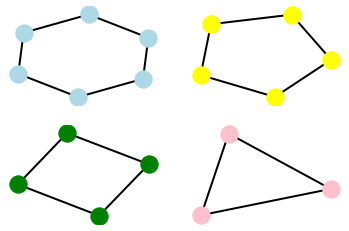

In [124]:
G_test = nx.Graph()
G_test.add_nodes_from([1,2,3,4,5,6])
G_test.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(1,6)])
G_next = nx.Graph()
G_next.add_nodes_from([1,2,3,4,5])
G_next.add_edges_from([(1,2),(2,3),(3,4),(4,5),(1,5)])
G_next4 = nx.Graph()
G_next4.add_nodes_from([1,2,3,4])
G_next4.add_edges_from([(1,2),(2,3),(3,4),(1,4)])
G_next3 = nx.Graph()
G_next3.add_nodes_from([1,2,3])
G_next3.add_edges_from([(1,2),(2,3),(1,3)])
plt.subplot(221)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_test, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "yellow",
          'width': 2,}
nx.draw(G_next, **options, with_labels=False, font_weight='bold')
plt.subplot(223)
options = {'node_color': "green",
          'width': 2,}
nx.draw(G_next4, **options, with_labels=False, font_weight='bold')
plt.subplot(224)
options = {'node_color': "pink",
          'width': 2,}
nx.draw(G_next3, **options, with_labels=False, font_weight='bold')
plt.show()

Регулярный граф степени 3 называется **кубическим графом**.<br>
Примеры кубических графов (граф куба и граф Петерсена):

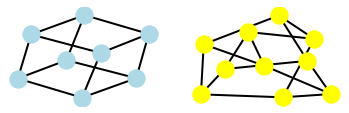

In [125]:
G_cube = nx.Graph()
G_cube.add_nodes_from([1,2,3,4,5,6,8])
G_cube.add_edges_from([(1,2),(1,7),(1,3),(7,5),(7,8),(8,2),(8,6),(2,4),(6,5),(6,4),(5,3),(3,4)])
G_pet = nx.petersen_graph()
plt.subplot(221)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_cube, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "yellow",
          'width': 2,}
nx.draw(G_pet, **options, with_labels=False, font_weight='bold')
plt.show()

<img align="left" src="theorem.png"> <br><br><br>
Пусть $\Gamma = (V,E) - k$-регулярный граф порядка $n$. <br>
Тогда верны следующие утверждения:<br>
* единичный вектор $1^n = (1,\dots,1)^T$ длины $n$ является **собственным вектором** графа $\Gamma$ для собственного значения $k$ с кратностью 1,
* модуль любого корня характеристического полинома графа $\Gamma$ не превосходит $k$.<br>

*Когда мы говорим о том, что мы ищем корни характеристического полинома графа $-$ это то же самое, что мы ищем собственные значения графа*.<br>
<img align="left" src="proof.png"> <br><br><br>
Первое утверждение доказывается по определению матрицы смежности.<br>
Так как граф $\Gamma -$ регулярный, $A*1^n = k*1^n$<br>
=> $k -$ собственное значение кратности 1.<br>
Для доказательства второго утверждения возьмем вектор $x = (x_1,\dots,x_n)^T$ длины $n - $ собственный вектор матрицы смежности $A(\Gamma)$, отвечающий некоторому собственному значению $\lambda$, и пусть $x_j = \displaystyle\max_{i=1,\dots,n}|x_i|$.<br>
*(На $j$-й позиции максимальное по модулю значение $x_i$)*.
Поскольку $x$ является собственным вектором для собственного значения $\lambda$ нашей матрицы, выполняется условие:<br>
$Ax = \lambda x$.<br>
Рассмотрим модули элементов, получающиеся на $j$-й позиции в левых и правых частях. Получаем:<br>
$|\lambda|\cdot|x_j| = |(Ax)_j| = |\displaystyle\sum_{i\in N(j)}x_i| \leq \displaystyle\sum_{i \in N(j)}|x_i| \leq k|x_j|$<br>
Таким образом **максимальное собственное значение** $k$-регулярного графа в точности равно $k$ с кратностью 1.

Для примера рассмотрим цикл длины 4.

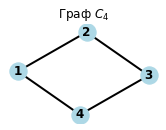

In [126]:
G_next4 = nx.Graph()
G_next4.add_nodes_from([1,2,3,4])
G_next4.add_edges_from([(1,2),(2,3),(3,4),(1,4)])
plt.subplot(221)
options = {'node_color': "lightblue",
          'width': 2,}
nx.draw(G_next4, **options, with_labels=True, font_weight='bold')
plt.title("Граф $C_4$")
plt.show()

Он является 2-регулярным.
По теореме 2 $-$ это собственное значение $C_4$ с кратностью 1.<br>
Все остальные значения по модулю должны быть меньше, чем 2.
*А сколько их всего должно быть?*<br>
*Мы бёрем граф, строим его матрицу смежности, и после этого рассматриваем только матрицу. Но так как это матрица смежности, это означает, что собственные значения матрицы являются собственными значениями графа.<br>
Всего у матрицы $n*n$ должно быть $n$ собственных значений.*<br>
Значит для $C_4$ нам нужно найти ещё 3 собственных значения.<br>
Рассмотрим матрицу смежности:<br>
$
A(C_4)=
\begin{pmatrix}
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0
\end{pmatrix}
$<br>
$det(\lambda I - A) = \lambda^2*(\lambda-2)*(\lambda+2) = 0$<br>
* $\lambda_1 = 0$ кратности 2,
* $\lambda_2 = 2$ кратности 1,
* $\lambda_3 = -2$ кратности 1.<br>

Получили 4 собственных значения.


![title](punkt_5.png)

<img align="left" src="defin.png">  <br>&nbsp;
Пусть $\Gamma = (V,E)$ порядка $n$ с матрицей смежности $A$. Тогда корни характеристического полинома графа $\Gamma$ являются собственными значениями $\lambda$ графа $\Gamma$ с кратностью $mul(\lambda)$, так, что под **спектром** понимается множество всех собственных значений и их кратности.<br>
<img align="left" src="obozn.png">  <br>&nbsp; $Sp(\Gamma) = Spec(\Gamma) = \{\lambda_i^{mul(\lambda_i)}\}, i = 1,\dots,n$<br>
Альтернативное обозначение:
<img align="left" src="obozn.png">  <br>&nbsp; $Spec(\Gamma) = [\lambda_1^{mul(\lambda_1)},\dots,\lambda_k^{mul(\lambda_k)}]$<br><br>

Таким образом, спектр цикла $C_4$, собственные значения которого мы уже находили:<br>
$Spec(C_4) = [-2^1, 0^2, 2^1]$. Степени обозначают кратности.<br>
Мы уже рассчитывали собственные значения графа $P_3$.<br>
Какой у него спектр?<br>
* A: $[-\sqrt{2}^1, 0^1, \sqrt{2}^1]$
* B: $[-\sqrt{2}^1, 0^2, \sqrt{2}^1]$
* C: $[-2^2, \sqrt{2}^2, \sqrt{4}^1]$

In [127]:
radio2 = widgets.RadioButtons(
    options=['A', 'B', 'C'],
    value = None,
    description='Spec(P3) = ',
    disabled=False
)
radio2

RadioButtons(description='Spec(P3) = ', options=('A', 'B', 'C'), value=None)

In [128]:
print(p4_spec())

Пожалуйста, выберите спектр графа.


In [129]:
#Проверка спектра графа
nx.adjacency_spectrum(G_next4)

array([ 2.+0.j, -2.+0.j,  0.+0.j,  0.+0.j])

In [130]:

graph_choose4 = widgets.ToggleButtons(
    options=['Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'],
    description='Граф:',
    disabled=False,
    button_style='', 
    tooltips=['Граф Петерсена', 'Граф Тутте', 'Лабиринт Седжвика', "Тетраэдр"],
#     icons=['check'] * 3
)
graph_choose4


ToggleButtons(description='Граф:', options=('Petersen', 'Tutte', 'Sedgewick Maze', 'Tetrahedral'), tooltips=('…

In [131]:
if graph_choose4.value == 'Petersen':
    print(nx.adjacency_spectrum(pet))
elif graph_choose4.value == 'Tutte':
    print(nx.adjacency_spectrum(tutte))
elif graph_choose4.value == 'Sedgewick Maze':
    print(nx.adjacency_spectrum(sed))
elif graph_choose4.value == 'Tetrahedral':
    print(nx.adjacency_spectrum(tet))

[-2.+0.j  1.+0.j  3.+0.j  1.+0.j -2.+0.j -2.+0.j -2.+0.j  1.+0.j  1.+0.j
  1.+0.j]


**Полезные факты**<br>
$\color{blue}{\text{Факт №1}}$<br>
Пусть $\Gamma = (V,E), |V| = n, A = A(\Gamma)$<br>
Пусть $\lambda_i - $ собственные значения $A$ с кратностью $mul(\lambda_i), \quad i = 1,\dots,n$<br>
Тогда $\displaystyle\sum_{i=1}^n mul(\lambda_i) = n$.
*(Сумма кратностей различных собственных значений графа порядка $n$ совпадает с порядком этого графа)*.<br>
Эта формула является очень удобной для проверки вычислений, когда вы высчитываете кратности собственных значений вашего графа.<br>


$\color{blue}{\text{Факт №2}}$<br>
Пусть $\Gamma_1 = (V_1,E_1)$ и $\Gamma_2 = (V_2,E_2)$ $-$ обыкновенные графы, $V_1 \cap V_2 = \emptyset$.<br>
$Sp(\Gamma_1), Sp(\Gamma_2) - $ спектры графов $\Gamma_1$ и $\Gamma_2$, соответственно. <br>
Для графа $\Gamma = \Gamma_1 \cup \Gamma_2$ его $Sp(\Gamma) = Sp(\Gamma_1) \cup Sp(\Gamma_2)$.<br>
Матрица графа $\Gamma$ будет блочная диагональная, в таком случае неважно, как искать собственные значения, для всей матрицы или для каждого блока отдельно.<br>
К примеру $Sp(C_4 \cup C_4) = [-2^2, 0^4, 2^2]$.<br>
Таким образом, если мы нашли спектр того и другого графа, то мы знаем, как их объединять.<br>
$Sp(C_4 \cup P_3) = [-2^1, -\sqrt{2}^1, 0^3, \sqrt{2^1}, 2^1]$. <br>
|V| = 7, 7 собственных значений, значит всё верно.

Существует открытая проблема $-$ характеризация целочисленных графов (1974).<br>
Среди 2-регулярных графов (циклов) имеется только три целочисленных графа: это $C_3, C_4$ и $C_5$.<br>
$Sp(C_3) = [-1^2, 2]$<br>
$Sp(C_4) = [-2^1, 0^2, 2^1]$<br>
$Sp(C_6) = [-2^1, -1^2, 1^2, 2^1]$<br>
Обратите внимание на то, как устроен спектр $C_6$. Есть значения 1 и -1, 2 и -2. Если такая ситуация встречается, мы часто используем обозначение:<br>
$Sp(C_6) = [\pm1^2,\pm^1]$<br>
В 1978 доказана теорема, что всего существует только 13 целочисленных кубических графов.<br>
Фактически существует характеризация целочисленных графов, являющихся 2-регулярными и 3-регулярными. Уже для 4-регулярных графов такой характеризации не существует.

![title](punkt_6.png)

Инвариант $-$ это некая графовая характеристика, которая в точности задает один-единственный граф.<br>
Была надежда, что спектр будет являться инвариантом, но оказалось, что нет, так как спектр не характеризует граф однозначно.<br>
<img align="left" src="defin.png">  <br>&nbsp; Пусть $\Gamma_1 = (V_1, E_1), \Gamma_2 = (V_2,E_2), \Gamma_1 \ncong \Gamma_2$.<br>
*($\Gamma_1$ не изоморфен $\Gamma_2$)*.
Тогда если $Sp(\Gamma_1) = Sp(\Gamma_2)$, то $\Gamma_1$ и $\Gamma_2$ называются **изоспектральными**.<br>
Изоспектральные графы необязательно изоморфные.

C:\Users\Oxanette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


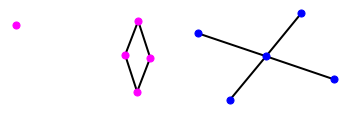

In [132]:
G_с4 = nx.Graph()
G_с4.add_nodes_from([1,2,3,4,5])
G_с4.add_edges_from([(1,2),(2,3),(3,4),(1,4)])
G_k14 = nx.Graph()
G_k14.add_nodes_from([1,2,3,4,5])
G_k14.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
plt.subplot(221)
options = {'node_color': "magenta",
          'width': 2, 'node_size': 50}
nx.draw(G_с4, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "blue",
          'width': 2,'node_size': 50}
nx.draw(G_k14, **options, with_labels=False, font_weight='bold')
plt.show()

Пример:<br>
$\Gamma_1 = C_4 \cup K_1$, $\Gamma_2 = K_{1,4}$.<br>
Эти графы не изоморфные, однако их спектр совпадает:<br>
$Sp(C_4 \cup K_1) = Sp(K_{1,4}) = [-2^1,0^3,2^1]$.


Если рассмотреть графы порядка 2 и 3, среди них нет изоспектральных графов.

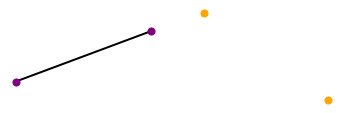

In [133]:
G_2 = nx.Graph()
G_2.add_nodes_from([1,2])
G_2.add_edges_from([(1,2)])
G_20 = nx.Graph()
G_20.add_nodes_from([1,2])

plt.subplot(221)
options = {'node_color': "purple",
          'width': 2, 'node_size': 50}
nx.draw(G_2, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "orange",
          'width': 2,'node_size': 50}
nx.draw(G_20, **options, with_labels=False, font_weight='bold')
plt.show()

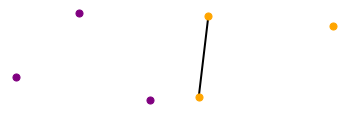

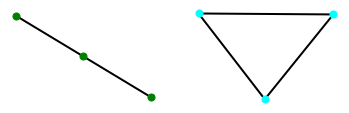

In [134]:
G_30 = nx.Graph()
G_30.add_nodes_from([1,2,3])
G_31 = nx.Graph()
G_31.add_nodes_from([1,2,3])
G_31.add_edges_from([(1,2)])
G_32 = nx.Graph()
G_32.add_nodes_from([1,2,3])
G_32.add_edges_from([(1,2), (1,3)])
G_33 = nx.Graph()
G_33.add_nodes_from([1,2,3])
G_33.add_edges_from([(1,2), (1,3), (2,3)])
plt.subplot(221)
options = {'node_color': "purple",
          'width': 2, 'node_size': 50}
nx.draw(G_30, **options, with_labels=False, font_weight='bold')
plt.subplot(222)
options = {'node_color': "orange",
          'width': 2,'node_size': 50}
nx.draw(G_31, **options, with_labels=False, font_weight='bold')
plt.show()
plt.subplot(223)
options = {'node_color': "green",
          'width': 2, 'node_size': 50}
nx.draw(G_32, **options, with_labels=False, font_weight='bold')
plt.subplot(224)
options = {'node_color': "cyan",
          'width': 2,'node_size': 50}
nx.draw(G_33, **options, with_labels=False, font_weight='bold')
plt.show()